# Pendulum Experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import math

## Natural Frequency Dataset 1

In [3]:
first = pd.read_csv('pendulumdata/dataset1_v2.csv')
first

,Unnamed: 0,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0,1.221101,0.058326,-0.088369,-0.121135
1,1,1.401064,0.035164,-0.065394,0.149948
2,2,1.581020,0.176472,-0.217663,-0.236736
3,3,1.760968,-0.046442,-0.089117,0.076747
4,4,1.940931,0.030521,-0.680533,-0.103797
...,...,...,...,...,...
79,79,14.225713,0.049786,0.176723,0.061044
80,80,14.375843,0.076490,-0.333096,0.103834
81,81,14.535937,-0.017847,-0.059465,-0.002312
82,82,14.656308,0.050889,0.097301,0.124152


In [4]:
x = first['Acceleration y (m/s^2)']

In [5]:
peaks, _ = signal.find_peaks(x, height=0)

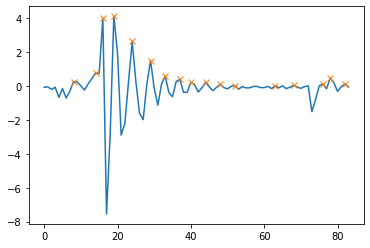

In [6]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")

In [7]:
x[peaks].head(15)

8     0.244141
14    0.752015
16    3.967712
19    4.090683
24    2.604672
29    1.479028
33    0.570287
37    0.381010
40    0.195234
44    0.195817
48    0.079496
52    0.004685
63    0.006006
68    0.015357
76    0.103441
Name: Acceleration y (m/s^2), dtype: float64

In [8]:
round(first['Time (s)'].iloc[33]-first['Time (s)'].iloc[29],2)

0.72

In [9]:
round(first['Time (s)'].iloc[37]-first['Time (s)'].iloc[33],2)

0.72

In [10]:
round(first['Time (s)'].iloc[44]-first['Time (s)'].iloc[40],2)

0.72

In [11]:
t1 = [first['Time (s)'].iloc[29],first['Time (s)'].iloc[33],first['Time (s)'].iloc[40]]
nf1 = pd.DataFrame(t1)
nf1.rename(columns={nf1.columns[0]:'t1'}, inplace=True)
nf1['t2'] = [first['Time (s)'].iloc[33], first['Time (s)'].iloc[37], first['Time (s)'].iloc[44]]
nf1['x1'] = [first['Acceleration y (m/s^2)'].iloc[29],first['Acceleration y (m/s^2)'].iloc[33],first['Acceleration y (m/s^2)'].iloc[40]]
nf1['x2'] = [first['Acceleration y (m/s^2)'].iloc[33], first['Acceleration y (m/s^2)'].iloc[37], first['Acceleration y (m/s^2)'].iloc[44]]
nf1['T'] = nf1['t2'] - nf1['t1']
nf1['delta'] = np.log(nf1['x1']/nf1['x2']) # np.log() stands for natural logarithm (ln)
nf1['zeta'] = nf1['delta']/(2*math.pi)
nf1['omega'] = nf1['delta']/(nf1['zeta']*nf1['T'])
nf1.to_excel('nf1.xlsx')
nf1

,t1,t2,x1,x2,T,delta,zeta,omega
0,5.824931,6.544756,1.479028,0.570287,0.719824,0.953001,0.151675,8.728778
1,6.544756,7.264580,0.570287,0.381010,0.719824,0.403314,0.064189,8.728778
2,7.804448,8.524272,0.195234,0.195817,0.719824,-0.002980,-0.000474,8.728778


## Natural Frequency Dataset 2

In [12]:
one = pd.read_csv('pendulumdata/dataset2.csv')
one

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.000000,-0.319102,0.000060,-0.419422
1,0.029993,-0.327891,-0.000149,-0.424025
2,0.059987,-0.326976,-0.000590,-0.411510
3,0.089979,-0.322512,-0.001164,-0.392503
4,0.120039,-0.314021,-0.001218,-0.382259
...,...,...,...,...
324,8.863692,0.162856,-0.397378,0.436667
325,8.893585,-0.101547,-0.225080,-0.015457
326,8.923511,0.007495,-0.135052,-0.197437
327,8.943573,-0.238525,-0.125037,-0.283369


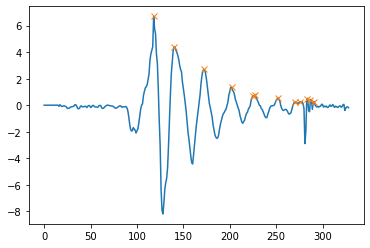

In [13]:
x_1 = one['Acceleration y (m/s^2)']
peaks_one, _ = signal.find_peaks(x_1, height=0.25)
plt.plot(x_1)
plt.plot(peaks_one, x_1[peaks_one], "x")

In [14]:
peaks_one

array([118, 140, 172, 202, 225, 227, 252, 270, 276, 283, 287, 291],
      dtype=int64)

In [15]:
round(one['Time (s)'].iloc[202]-one['Time (s)'].iloc[172],2)

0.75

In [16]:
round(one['Time (s)'].iloc[227]-one['Time (s)'].iloc[202],2)

0.75

In [17]:
round(one['Time (s)'].iloc[252]-one['Time (s)'].iloc[227],2)

0.75

In [18]:
t1 = [one['Time (s)'].iloc[172],one['Time (s)'].iloc[202],one['Time (s)'].iloc[227]]
nf1 = pd.DataFrame(t1)
nf1.rename(columns={nf1.columns[0]:'t1'}, inplace=True)
nf1['t2'] = [one['Time (s)'].iloc[202], one['Time (s)'].iloc[227], one['Time (s)'].iloc[252]]
nf1['x1'] = [one['Acceleration y (m/s^2)'].iloc[172],one['Acceleration y (m/s^2)'].iloc[202],one['Acceleration y (m/s^2)'].iloc[227]]
nf1['x2'] = [one['Acceleration y (m/s^2)'].iloc[202], one['Acceleration y (m/s^2)'].iloc[227], one['Acceleration y (m/s^2)'].iloc[252]]
nf1['T'] = nf1['t2'] - nf1['t1']
nf1['delta'] = np.log(nf1['x1']/nf1['x2']) # np.log() stands for natural logarithm (ln)
nf1['zeta'] = nf1['delta']/(2*math.pi)
nf1['omega'] = nf1['delta']/(nf1['zeta']*nf1['T'])
nf1.to_excel('nf2.xlsx')
nf1

,t1,t2,x1,x2,T,delta,zeta,omega
0,4.454603,5.205420,2.697021,1.344256,0.750817,0.696307,0.110821,8.368467
1,5.205420,5.955237,1.344256,0.737562,0.749817,0.600246,0.095532,8.379627
2,5.955237,6.705054,0.737562,0.561367,0.749817,0.272975,0.043445,8.379627


## Natural Frequency Dataset 3

In [19]:
hadibe = pd.read_csv('data2/5.csv')[::20]
hadibe.reset_index(drop=True)
hadibe.to_csv('pendulumdata/dataset3_v2.csv')

In [20]:
one = pd.read_csv('pendulumdata/dataset3_v2.csv')
one

,Unnamed: 0,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0,0.000000,0.168407,-0.169823,-0.028083
1,20,0.599851,-0.086218,0.033126,0.015425
2,40,1.199707,0.068546,-0.101357,-0.064980
3,60,1.650595,-0.007800,-1.268885,0.062409
4,80,2.180800,-0.295648,2.412134,0.359778
5,100,2.681343,-0.238231,1.305663,-0.330157
6,120,3.281197,0.141682,-2.025706,-0.202320
7,140,3.881050,0.083492,-0.881768,0.314883
8,160,4.481346,-0.143731,0.113397,-0.368510
9,180,5.081199,0.031303,0.240651,0.459441


In [21]:
x_1 = one['Acceleration y (m/s^2)']

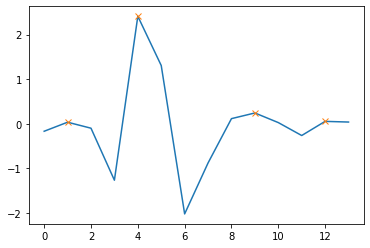

In [22]:
peaks_one, _ = signal.find_peaks(x_1, height=0)
plt.plot(x_1)
plt.plot(peaks_one, x_1[peaks_one], "x")

In [23]:
peaks_one

array([ 1,  4,  9, 12], dtype=int64)

In [24]:
round(one['Time (s)'].iloc[4]-one['Time (s)'].iloc[1],2)

1.58

In [25]:
round(one['Time (s)'].iloc[7]-one['Time (s)'].iloc[4],2)

1.7

In [26]:
round(one['Time (s)'].iloc[12]-one['Time (s)'].iloc[9],2)

1.8

In [27]:
t1 = [4.40,one['Time (s)'].iloc[4],one['Time (s)'].iloc[9]]
nf1 = pd.DataFrame(t1)
nf1.rename(columns={nf1.columns[0]:'t1'}, inplace=True)
nf1['t2'] = [5.50, one['Time (s)'].iloc[7], one['Time (s)'].iloc[12]]
nf1['x1'] = [1.30,one['Acceleration y (m/s^2)'].iloc[4],one['Acceleration y (m/s^2)'].iloc[9]]
nf1['x2'] = [2.41, one['Acceleration y (m/s^2)'].iloc[9], one['Acceleration y (m/s^2)'].iloc[12]]
nf1['T'] = nf1['t2'] - nf1['t1']
nf1['delta'] = np.log(nf1['x1']/nf1['x2']) # np.log() stands for natural logarithm (ln)
nf1['zeta'] = nf1['delta']/(2*math.pi)
nf1['omega'] = nf1['delta']/(nf1['zeta']*nf1['T'])
nf1.to_excel('nf3.xlsx')
nf1

,t1,t2,x1,x2,T,delta,zeta,omega
0,4.400000,5.50000,1.300000,2.410000,1.10000,-0.617262,-0.098240,5.711987
1,2.180800,3.88105,2.412134,0.240651,1.70025,2.304919,0.366839,3.695448
2,5.081199,6.88076,0.240651,0.051924,1.79956,1.533572,0.244076,3.491511
